In [2]:
%pip install numpy
%pip install torch
%pip install pandas
%pip install scikit-learn

import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib
%pip install mlxtend
%pip install onnxmltools
%pip install onnxruntime
%pip install skl2onnx

import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap # to see the correlation matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination
from sklearn.metrics import r2_score # this is the metric people want to see - what they are used to see

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install xgboost
import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install mlxtend
!pip install onnxmltools
!pip install onnxruntime

In [6]:
!pip install skl2onnx

In [7]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [8]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 32
learning_rate = 0.001 ## 0.001 - We can play with this number making it bigger or smaller
N_Epochs      = 100 # Number of times we give the whole data set to the model

epsilon = 0.0001

In [9]:
# -------------- Read the data --------------

path_data = './dataset.csv'

songs_raw_data = pd.read_csv( path_data, delimiter="," )

In [10]:
songs_raw_data

# What we are going to predict is the popularity (last column), so we will have 10 columns as input

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [11]:
songs_raw_data.shape

(114000, 21)

In [12]:
headers_list = songs_raw_data.columns.values.tolist()

headers_list

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [13]:
# List of columns we only want
headers_list2 = ['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'tempo',
 'popularity']

print(headers_list2)

['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'popularity']


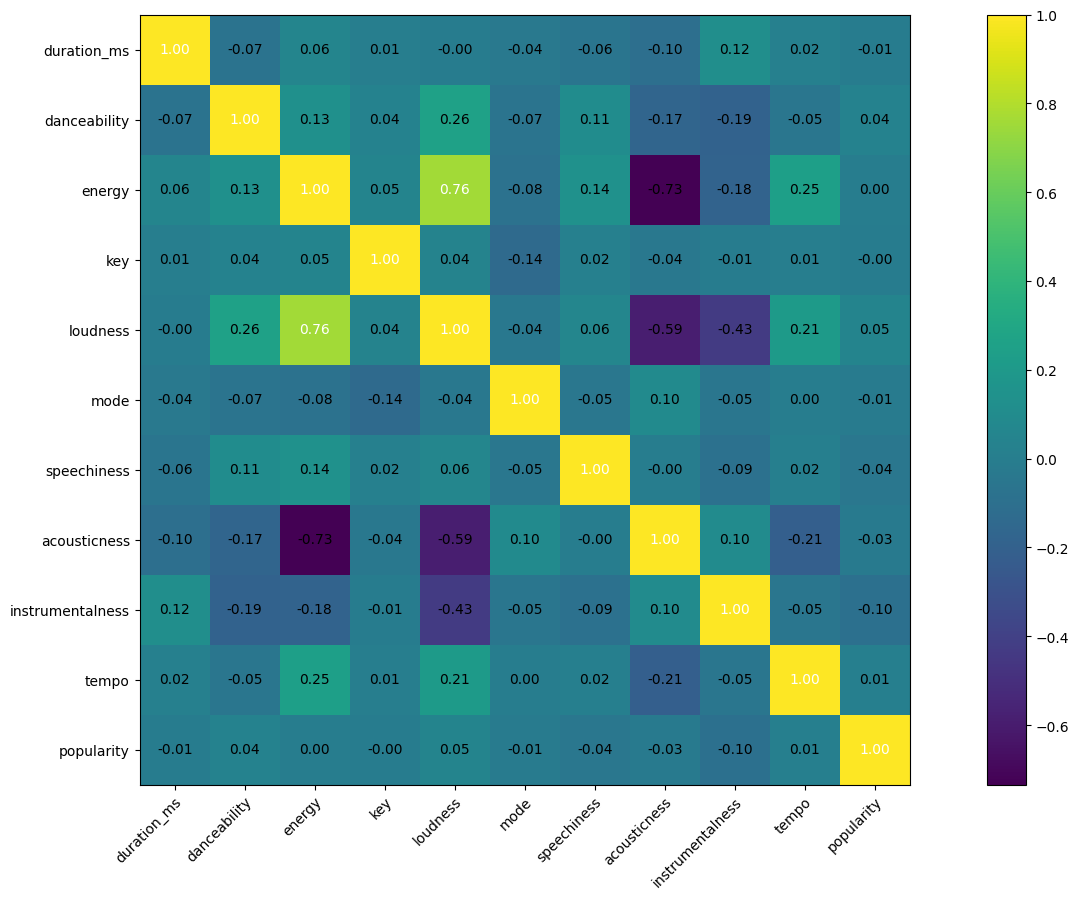

In [14]:
# Convert to numeric and ensure proper data type
data_for_corr = songs_raw_data[headers_list2].apply(pd.to_numeric, errors='coerce')
# Remove any rows with NaN values that might cause issues
data_for_corr = data_for_corr.dropna()
# Convert to numpy array with explicit float type
corr_data = data_for_corr.values.astype(float).T

cm = np.corrcoef(corr_data)
hm = heatmap(cm, row_names=headers_list2, column_names=headers_list2, figsize=(20,10))
plt.show()

In [15]:
songs_raw_data = songs_raw_data[headers_list2]
songs_raw_data

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,tempo,popularity
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,87.917,73
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,77.489,55
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,76.332,57
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,181.740,71
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,119.949,82
...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,125.995,21
113996,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,85.239,22
113997,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,132.378,22
113998,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,135.960,41


In [16]:
## Convert Pandas to Numpy

songs_raw_data_np = songs_raw_data.to_numpy()

In [17]:
songs_raw_data_np[6, 1]


np.float64(0.407)

In [18]:
songs_raw_data_np.shape

(114000, 11)

In [19]:
# X is going to be all the columns but the last one
X = songs_raw_data_np[:, :-1]

# We don't convert the Y into integers since we are doing regression
y = songs_raw_data_np[:, 10:11]

In [20]:
print(X)
print(y)

[[2.30666e+05 6.76000e-01 4.61000e-01 ... 3.22000e-02 1.01000e-06
  8.79170e+01]
 [1.49610e+05 4.20000e-01 1.66000e-01 ... 9.24000e-01 5.56000e-06
  7.74890e+01]
 [2.10826e+05 4.38000e-01 3.59000e-01 ... 2.10000e-01 0.00000e+00
  7.63320e+01]
 ...
 [2.71466e+05 6.29000e-01 3.29000e-01 ... 8.67000e-01 0.00000e+00
  1.32378e+02]
 [2.83893e+05 5.87000e-01 5.06000e-01 ... 3.81000e-01 0.00000e+00
  1.35960e+02]
 [2.41826e+05 5.26000e-01 4.87000e-01 ... 6.81000e-01 0.00000e+00
  7.91980e+01]]
[[73.]
 [55.]
 [57.]
 ...
 [22.]
 [41.]
 [22.]]


In [21]:
print(X.shape)

print(y.shape)

(114000, 10)
(114000, 1)


In [22]:
# Random so we can run it 10 times and do an average
random_seed = int( 11)

In [23]:
# This function from sklearn is the one we will always use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91200, 10)
(22800, 10)
(91200, 1)
(22800, 1)


In [25]:
y_test.dtype

dtype('float64')

In [26]:
type(y_test)

numpy.ndarray

In [27]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [28]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [29]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [30]:
x_means

tensor([[ 2.2792e+05,  5.6683e-01,  6.4121e-01,  5.3105e+00, -8.2620e+00,
          6.3738e-01,  8.4699e-02,  3.1489e-01,  1.5620e-01,  1.2216e+02]])

In [31]:
x_deviations

tensor([[1.0501e+05, 1.7372e-01, 2.5176e-01, 3.5589e+00, 5.0313e+00, 4.8086e-01,
         1.0554e-01, 3.3260e-01, 3.0983e-01, 2.9981e+01]])

In [32]:
X_train_tr.shape

torch.Size([91200, 10])

In [33]:
y_train_tr.shape

torch.Size([91200, 1])

In [34]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )

In [35]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )


In [36]:
train_dl

# NN Architectures

In [37]:
## Linear Regression

# This is actually a linear model but we are going to write it in the way
# of NN

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(10, 1)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred

In [38]:
# Added later, the rest of architectures

## MLP - Multi-layer perceptron

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(10, 8)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)

        ## return torch.round( y_pred )
        return y_pred

In [39]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(10, 10)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)

        ## return torch.round( y_pred )
        return y_pred

In [40]:
## Linear plus Nonlinear
## f1 + f2

# As a solution to the vanishing gradients -> weights become 0
# y = f(x) + x <- Kind of the idea of this architecture

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        ## F1
        self.f1_linear1 = nn.Linear(10, 1) # <- Linear one

        ## F2
        self.f2_linear1 = nn.Linear(10, 14) # <- MLP
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)


    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        ## F1
        f1 = self.f1_linear1(x)

        ## F2 - this one is smaller, the one affecting more is F1
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)

        y_pred = f1 + f2

        ## return torch.round( y_pred )
        return y_pred

In [41]:
## Linear + DL

class LinearPlusNonLinear_Net2(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        ## F1
        self.f1_linear1 = nn.Linear(10, 1) # <- Linear one

        ## F2
        self.f2_linear1 = nn.Linear(10, 10) # <- DL
        self.f2_act1    = nn.ReLU()

        self.f2_linear2 = nn.Linear(10, 6) # <- DL
        self.f2_act2    = nn.ReLU()

        self.f2_linear3 = nn.Linear(6, 1) # <- DL
        # In the last one we dont need Relu
        # In classification we would have used softmax


    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        ## F1
        f1 = self.f1_linear1(x)

        ## F2 - this one is smaller, the one affecting more is F1
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)

        f2 = self.f2_linear2(f2)
        f2 = self.f2_act2(f2)

        f2 = self.f2_linear3(f2)

        y_pred = f1 + f2

        ## return torch.round( y_pred )
        return y_pred

In [42]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb) # + dont kill humans

            # This 3 lines do all the magic
            opt.zero_grad() # Clear the gradients of the optimizer
            loss.backward() # Calculate the derivatives for every weight
            opt.step()      # Update the weights using the derivatives

        if epoch % 20 == 0:
            print(epoch, "loss=", loss)


In [43]:
model = LinearPlusNonLinear_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate ) # 11 features and 1 bias
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(342.4119, grad_fn=<MseLossBackward0>)
20 loss= tensor(625.4528, grad_fn=<MseLossBackward0>)
40 loss= tensor(538.5576, grad_fn=<MseLossBackward0>)
60 loss= tensor(422.9156, grad_fn=<MseLossBackward0>)
80 loss= tensor(506.8353, grad_fn=<MseLossBackward0>)


In [44]:
# EVALUATING

y_pred_test = model( X_test_tr )

In [45]:
y_pred_test.shape

torch.Size([22800, 1])

In [46]:
# from skn R square
print( "Testing R**2: ", r2_score(
                          y_test_tr.numpy(),            # real data
                          y_pred_test.detach().numpy()  # pred data
))

# Detatch from the computational graph is needed
# The real data has to ALWAYS be before the pred data
# If we get a negative number means that something went wrong
# The closer to 1 the better

Testing R**2:  0.05938237905502319


In [47]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])

# Iteracts and predicts the value printing it

************************************
pred, real
(array([33.634136], dtype=float32), array([56.], dtype=float32))
************************************
pred, real
(array([30.983288], dtype=float32), array([27.], dtype=float32))
************************************
pred, real
(array([30.26569], dtype=float32), array([49.], dtype=float32))
************************************
pred, real
(array([33.29601], dtype=float32), array([7.], dtype=float32))
************************************
pred, real
(array([29.67965], dtype=float32), array([69.], dtype=float32))
************************************
pred, real
(array([33.28762], dtype=float32), array([1.], dtype=float32))
************************************
pred, real
(array([35.93022], dtype=float32), array([46.], dtype=float32))
************************************
pred, real
(array([27.649826], dtype=float32), array([58.], dtype=float32))
************************************
pred, real
(array([30.16378], dtype=float32), array([21.], dtype=f

# Deploy Model

In [48]:
model.eval()

dummy_input = torch.randn(1, 11)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model,                        # Model
        dummy_input,                  # To tell the size of the imput vector
        "DLnet_WineData.onnx",        # Name of the file created
        verbose=False,
        input_names = input_names,
        output_names = output_names

)

# The trick is that we have to look at the version and if it is compatible
# With our HTML and JS version

/var/folders/m2/93__3hzx47j742lp_6ngc_tm0000gn/T/ipykernel_16229/2735245444.py:8: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


RuntimeError: The size of tensor a (11) must match the size of tensor b (10) at non-singleton dimension 1

# **XGBoost**

In [49]:
# Read the notes.
# Usually better interpolating (worse at extrapolating)

regressor = xgb.XGBRegressor(

        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
)

In [50]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred = regressor.predict(X_test)

In [52]:
y_pred.shape

(22800,)

In [53]:
y_pred

array([38.430115, 34.318707, 31.000582, ..., 17.432095, 41.154545,
       42.561676], dtype=float32)

In [54]:
# Evaluate with XGBoost

r2_score(y_test, y_pred)

0.10769766569137573

In [55]:
# Next step will be to deploy it

In [61]:
%pip install hummingbird-ml

# Export XGBoost model to ONNX format for deployment
import os

# Try different methods to convert XGBoost to ONNX
# Method 1: hummingbird-ml (best for XGBoost to ONNX)
try:
    import hummingbird.ml
    USE_HUMMINGBIRD = True
except ImportError:
    USE_HUMMINGBIRD = False
    # Method 2: Try skl2onnx with XGBoost support
    try:
        import skl2onnx
        from skl2onnx.common.data_types import FloatTensorType
        USE_SKL2ONNX = True
    except ImportError:
        USE_SKL2ONNX = False
        # Method 3: Try onnxmltools
        try:
            import onnxmltools
            from onnxmltools.convert.common.data_types import FloatTensorType
            USE_ONNXMLTOOLS = True
        except ImportError:
            USE_ONNXMLTOOLS = False
            print("Error: No ONNX conversion library found.")
            print("Please install: pip install hummingbird-ml")
            print("  OR: pip install skl2onnx")
            raise

# Get the current working directory (where the notebook is located)
notebook_dir = os.getcwd()

# Get the input shape from training data
# XGBoost expects 2D input: (batch_size, num_features)
try:
    if hasattr(X_train, 'shape'):
        num_features = X_train.shape[1]
    elif hasattr(regressor, 'n_features_in_'):
        num_features = regressor.n_features_in_
    else:
        # Try to get from a sample
        num_features = len(X_train[0]) if len(X_train) > 0 else None
        if num_features is None:
            raise ValueError("Could not determine input shape")
except Exception as e:
    print(f"Error determining input shape: {e}")
    print("Please ensure X_train is available or the model has been trained.")
    raise

print(f"Model input shape: (batch_size, {num_features})")

# Define the output path for the ONNX model
onnx_model_path = os.path.join(notebook_dir, 'xgboost_songs_model.onnx')

# Convert the XGBoost model to ONNX
try:
    if USE_HUMMINGBIRD:
        # Method 1: Use hummingbird-ml (best for XGBoost to ONNX conversion)
        print("Using hummingbird-ml to convert XGBoost model to ONNX...")
        # Convert XGBoost model to ONNX using hummingbird
        hb_model = hummingbird.ml.convert(regressor, "onnx", test_input=X_train[:1] if hasattr(X_train, '__getitem__') else [X_train[0]])
        
        # Save the ONNX model
        hb_model.save(onnx_model_path)
        print("Conversion successful using hummingbird-ml!")
        
    elif USE_SKL2ONNX:
        # Method 2: Try skl2onnx
        print("Using skl2onnx to convert XGBoost model to ONNX...")
        # Define the input type for ONNX
        initial_type = [('float_input', FloatTensorType(shape=[None, num_features]))]
        
        onnx_model = skl2onnx.convert_sklearn(
            regressor,
            initial_types=initial_type,
            target_opset=11
        )
        
        # Save the ONNX model
        with open(onnx_model_path, "wb") as f:
            f.write(onnx_model.SerializeToString())
            
    elif USE_ONNXMLTOOLS:
        # Method 3: Try onnxmltools
        print("Using onnxmltools to convert XGBoost model to ONNX...")
        # Define the input type for ONNX
        initial_type = [('float_input', FloatTensorType(shape=[None, num_features]))]
        
        onnx_model = onnxmltools.convert_sklearn(
            regressor,
            initial_types=initial_type,
            target_opset=11
        )
        
        # Save the ONNX model
        with open(onnx_model_path, "wb") as f:
            f.write(onnx_model.SerializeToString())
    else:
        raise ValueError("No conversion method available")
    
    print(f"✓ Model successfully exported to: {onnx_model_path}")
    print(f"  Input shape: (batch_size, {num_features})")
    print(f"  Output: Single regression value")
    print(f"  Model is ready for deployment!")
    
    # Verify the export by checking if file exists
    if os.path.exists(onnx_model_path):
        file_size = os.path.getsize(onnx_model_path) / 1024  # Size in KB
        print(f"  File size: {file_size:.2f} KB")
    
except Exception as e:
    print(f"✗ Error exporting model: {str(e)}")
    print("  Make sure the model is trained (regressor.fit() has been called).")
    print("  For XGBoost, you may need to install: pip install skl2onnx")
    print("  Note: XGBoost models sometimes require additional converters.")
    import traceback
    traceback.print_exc()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 16.2 MB/s  0:00:01m0:00:0100:01
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:━━━━━━━━━━━━━━━━━━━ 0/4 [onnx]
      Successfully uninstalled onnx-1.19.1━━ 0/4 [onnx]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [hummingbird-ml]
Note: you may need to restart the kernel to use updated packages.
Model input shape: (batch_size, 10)
Using hummingbird-ml to convert XGBoost model to ONNX...
Model saved with digest: 7557205346e5cf095a942028dcb86baa82e63ec5
Conversion successful using hummingbird-ml!
✓ Model successfully exported to: /Users/blasmorenolaguna/Documents/TODO/Coding/ClassificationAndRegression/regression/xgboost_songs_model.onnx
  Input shape: (batch_size, 10)
  Output: Single regression value
  Model is ready for deployment!
